In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

2025-08-24 13:37:22.819817: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756042643.117717      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756042643.202868      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
print("Loading and preprocessing the IMDb dataset...")


max_features = 10000  
maxlen = 500         
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(f"{len(x_train)} training sequences")
print(f"{len(x_test)} test sequences")

print("Padding sequences...")
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

Loading and preprocessing the IMDb dataset...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
25000 training sequences
25000 test sequences
Padding sequences...
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [3]:
print("\nBuilding the RNN model...")

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

print("Compiling the model...")
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



Building the RNN model...
Compiling the model...


2025-08-24 13:37:44.987859: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:

print("\nStarting model training...")
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)



Starting model training...
Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 142ms/step - accuracy: 0.5562 - loss: 0.6779 - val_accuracy: 0.7740 - val_loss: 0.5028
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.7998 - loss: 0.4528 - val_accuracy: 0.7434 - val_loss: 0.5637
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.8570 - loss: 0.3516 - val_accuracy: 0.8544 - val_loss: 0.3479
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.8876 - loss: 0.2818 - val_accuracy: 0.8202 - val_loss: 0.4948
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9149 - loss: 0.2205 - val_accuracy: 0.8632 - val_loss: 0.3383
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.9330 - loss: 0.1805 - val_accuracy: 0.8552 - val_loss: 0.3807
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.9505 - loss: 0.1394 - val_accuracy: 0.8590 - val_loss: 0.4545
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step 

In [5]:

print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")



Evaluating the model on the test set...
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8227 - loss: 0.5681
Test Accuracy: 82.70%
Test Loss: 0.5598


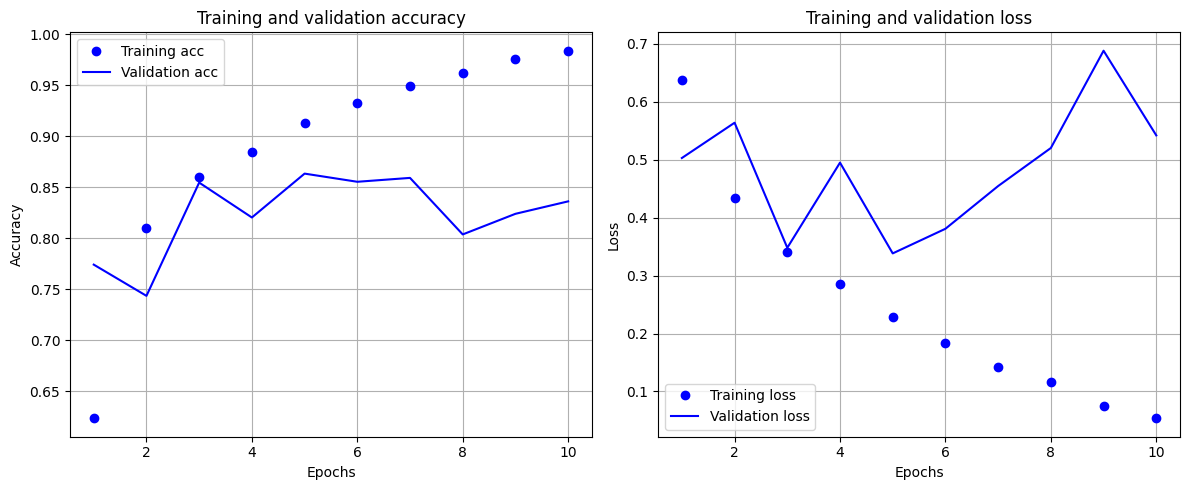

In [6]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('rnn_training_history.png')
plt.show()
